In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt

In [2]:
#df_hun['Year'] = pd.to_datetime(df_hun.Year, format='%Y')
#print(df_hun.dtypes)
#res = df_hun.loc[df_hun['Indicator Name'].str.startswith('Survival to age 65, male') & df_hun['Year'].between('2012', '2022'), ['Year','Indicator Name','Value']]
#res = df_hun.loc[df_hun['Indicator Name'].str.startswith('Gini index') & df_hun['Year'].between('2012', '2022'), ['Year','Indicator Name','Value']]

#### PIVOT ALL TABLES IN THE PATH

In [3]:

# use glob to get all the csv files 
# in the folder 
path = os.getcwd() + "/datasetForTesting/countries/"
path_happiness = os.getcwd() + "\datasetForTesting\happiness\WorldHappinessIndex2013-2023.csv"
csv_files = glob.glob(os.path.join(path, "*.csv")) 
csv_path_saved_path = os.getcwd() + "/remade/"
happiness_df = pd.read_csv(path_happiness)
happiness_df.rename(columns={'Country': 'Country Name', 'Index': 'Happiness Index', 'Rank':'Happiness Rank'}, inplace=True)
dataFrames = {}
# loop over the list of csv files 
for f in csv_files: 
    # read the csv file 
    df = pd.read_csv(f)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    head, tail = f.split(".")
    name = head[len(head) - 3:]
    table_to_pivot = pd.DataFrame(df)
    dataFrames[name] = pd.pivot_table(table_to_pivot, index=["Year", "Country Name"], columns=["Indicator Name"], values="Value", aggfunc="first").reset_index()
    csv_path_saved = csv_path_saved_path + name + '.csv'
    dataFrames[name] = pd.merge(dataFrames[name], happiness_df, on = ['Year', 'Country Name'], how='outer')
    dataFrames[name].to_csv(csv_path_saved, index=True)
    csv_path_saved = ""
    


#### RENAME COLUMN NAMES

In [4]:
charsToReplace = [',', ' (',  ') ', ')', ';', '/', '=', '$']
charsToReplace2 = [' ','-']
for table in dataFrames:   
    for col in dataFrames[table].columns:
        new_col_name = col
        for char in charsToReplace:
            new_col_name = new_col_name.replace(char,'')
        for char in charsToReplace2:
            new_col_name = new_col_name.replace(char,'_')
        new_col_name = new_col_name.replace('+','_plus')
        new_col_name =  new_col_name.replace('%','_precent')
        new_col_name =  new_col_name.replace('__','_')
        #print(col)
        #print(new_col_name)
        dataFrames[table].rename(columns={col: new_col_name}, inplace=True)

for table in dataFrames:   
    for col in dataFrames[table].columns:
        print(col)
    break
        
import matplotlib.pyplot as plt
#barplot = dataFrames['hun'].dropna(subset=['Gini_index']).plot.bar(x = 'Year', y = ['Gini_index', 'Suicide_mortality_rate_(per_100,000_population)'],  figsize = (16, 8))

#plot.bar_label(barplot.containers[0])
#for container in barplot.containers:
#    barplot.bar_label(container, padding=3)

#plot.xticks(rotation=45, horizontalalignment="left")
#plot.bar_label(bar_plot, labels= dataFrames['hun'].dropna(subset=['Gini_index']), label_type="center")
#plot.show()



Year
Country_Name
5_bank_asset_concentration
A_woman_can_apply_for_a_passport_in_the_same_way_as_a_man1yes_0no
A_woman_can_be_head_of_household_in_the_same_way_as_a_man1yes_0no
A_woman_can_choose_where_to_live_in_the_same_way_as_a_man1yes_0no
A_woman_can_get_a_job_in_the_same_way_as_a_man1yes_0no
A_woman_can_obtain_a_judgment_of_divorce_in_the_same_way_as_a_man1yes_0no
A_woman_can_open_a_bank_account_in_the_same_way_as_a_man1yes_0no
A_woman_can_register_a_business_in_the_same_way_as_a_man1yes_0no
A_woman_can_sign_a_contract_in_the_same_way_as_a_man1yes_0no
A_woman_can_travel_outside_her_home_in_the_same_way_as_a_man1yes_0no
A_woman_can_travel_outside_the_country_in_the_same_way_as_a_man1yes_0no
A_woman_can_work_at_night_in_the_same_way_as_a_man1yes_0no
A_woman_can_work_in_a_job_deemed_dangerous_in_the_same_way_as_a_man1yes_0no
A_woman_can_work_in_an_industrial_job_in_the_same_way_as_a_man1yes_0no
A_woman_has_the_same_rights_to_remarry_as_a_man1yes_0no
ATMs_per_100000_adults
Access_to_a

## SOCIAL AND ECONOMIC DEVELOPMENT

### GINI INDEX

In [374]:
## GINI-index är en statistisk måttstock som används för att mäta inkomst- eller förmögenhetsfördelningen inom en population. 
### Det syftar till att kvantifiera ojämlikhet och indikerar hur inkomster eller förmögenhet är fördelade bland medlemmarna 
## i ett samhälle eller ett land. Ju högre GINI-index är, desto större är ojämlikheten, 
## medan ett lägre index indikerar en mer jämnt fördelad inkomst eller förmögenhet.

## GINI-index mäts på en skala från 0 till 100, där:

## 0 representerar fullständig inkomstjämlikhet, vilket innebär att alla individer har exakt samma inkomst eller förmögenhet.
## 100 representerar fullständig inkomstojämlikhet, där en enda person har all inkomst eller förmögenhet, medan alla andra har ingen.
## GINI-index beräknas vanligtvis med hjälp av data om inkomster eller förmögenhet från en befolkning, och den vanligaste metoden är Lorenz-kurvan. Lorenz-kurvan jämför den faktiska inkomst- eller förmögenhetsfördelningen med en hypotetisk situation där fördelningen skulle vara helt jämn.

## GINI-index är ett användbart verktyg för att analysera ekonomisk ojämlikhet och hjälper policymakare och forskare att förstå hur inkomst- eller förmögenhetsfördelningen kan påverka samhället och ekonomin. Det används ofta i nationella och internationella rapporter och analyser för att utvärdera ojämlikhetens omfattning och utveckling över tid.







#### Extract GINI INDEX where the value is not NaN  in one table

In [351]:
gini_indices = {}
for table in dataFrames:
    gini_indices['Year'] = pd.to_datetime(dataFrames[table]['Year'], format='%Y', errors='coerce')
    country = dataFrames[table].Country_Name[0]
    gini_indices[country] = pd.to_numeric(dataFrames[table].Gini_index)
gini = pd.DataFrame(gini_indices)
gini = gini.dropna()
gini['Year'] = gini['Year'].dt.to_period('y').astype(str)
print(gini)

    Year  Bulgaria  Finland  Hungary  Iceland  Norway  Poland  Romania  Sweden
46  2006      35.7     28.0     28.3     30.2    26.4    34.7     39.6    26.4
47  2007      36.1     28.3     27.9     29.5    27.1    34.0     37.5    27.1
48  2008      33.6     27.8     27.5     31.8    27.0    33.5     36.4    28.1
49  2009      33.8     27.5     27.0     28.7    26.2    33.4     35.6    27.3
50  2010      35.7     27.7     29.4     26.2    25.7    33.2     35.5    27.7
51  2011      34.3     27.6     29.2     26.8    25.3    33.2     35.9    27.6
52  2012      36.0     27.1     30.8     26.8    25.7    33.0     36.5    27.6
53  2013      36.6     27.2     31.5     25.4    26.4    33.1     36.9    28.8
54  2014      37.4     26.8     30.9     27.8    26.8    32.8     36.0    28.4
55  2015      38.6     27.1     30.4     26.8    27.5    31.8     35.9    29.2
56  2016      40.6     27.1     30.3     27.2    28.5    31.2     34.4    29.6
57  2017      40.4     27.4     30.6     26.1    27.

#### Visualize GINI Index through years in all countries

In [6]:
barplot = gini_replaced.plot.bar(x = 'Year', y = pos,  figsize = (8, 2), linewidth = 0.81)
plt.title("Gini index in countries")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(prop={'size': 10}, loc='center left', bbox_to_anchor=(1.0, 0.5))


NameError: name 'gini_replaced' is not defined

In [352]:
gini.reset_index(inplace=True, drop=False)


In [281]:
print(gini)

    level_0  index  Year  Bulgaria  Finland  Hungary  Iceland  Norway  Poland  \
0         0     46  2006      35.7     28.0     28.3     30.2    26.4    34.7   
1         1     47  2007      36.1     28.3     27.9     29.5    27.1    34.0   
2         2     48  2008      33.6     27.8     27.5     31.8    27.0    33.5   
3         3     49  2009      33.8     27.5     27.0     28.7    26.2    33.4   
4         4     50  2010      35.7     27.7     29.4     26.2    25.7    33.2   
5         5     51  2011      34.3     27.6     29.2     26.8    25.3    33.2   
6         6     52  2012      36.0     27.1     30.8     26.8    25.7    33.0   
7         7     53  2013      36.6     27.2     31.5     25.4    26.4    33.1   
8         8     54  2014      37.4     26.8     30.9     27.8    26.8    32.8   
9         9     55  2015      38.6     27.1     30.4     26.8    27.5    31.8   
10       10     56  2016      40.6     27.1     30.3     27.2    28.5    31.2   
11       11     57  2017    

12


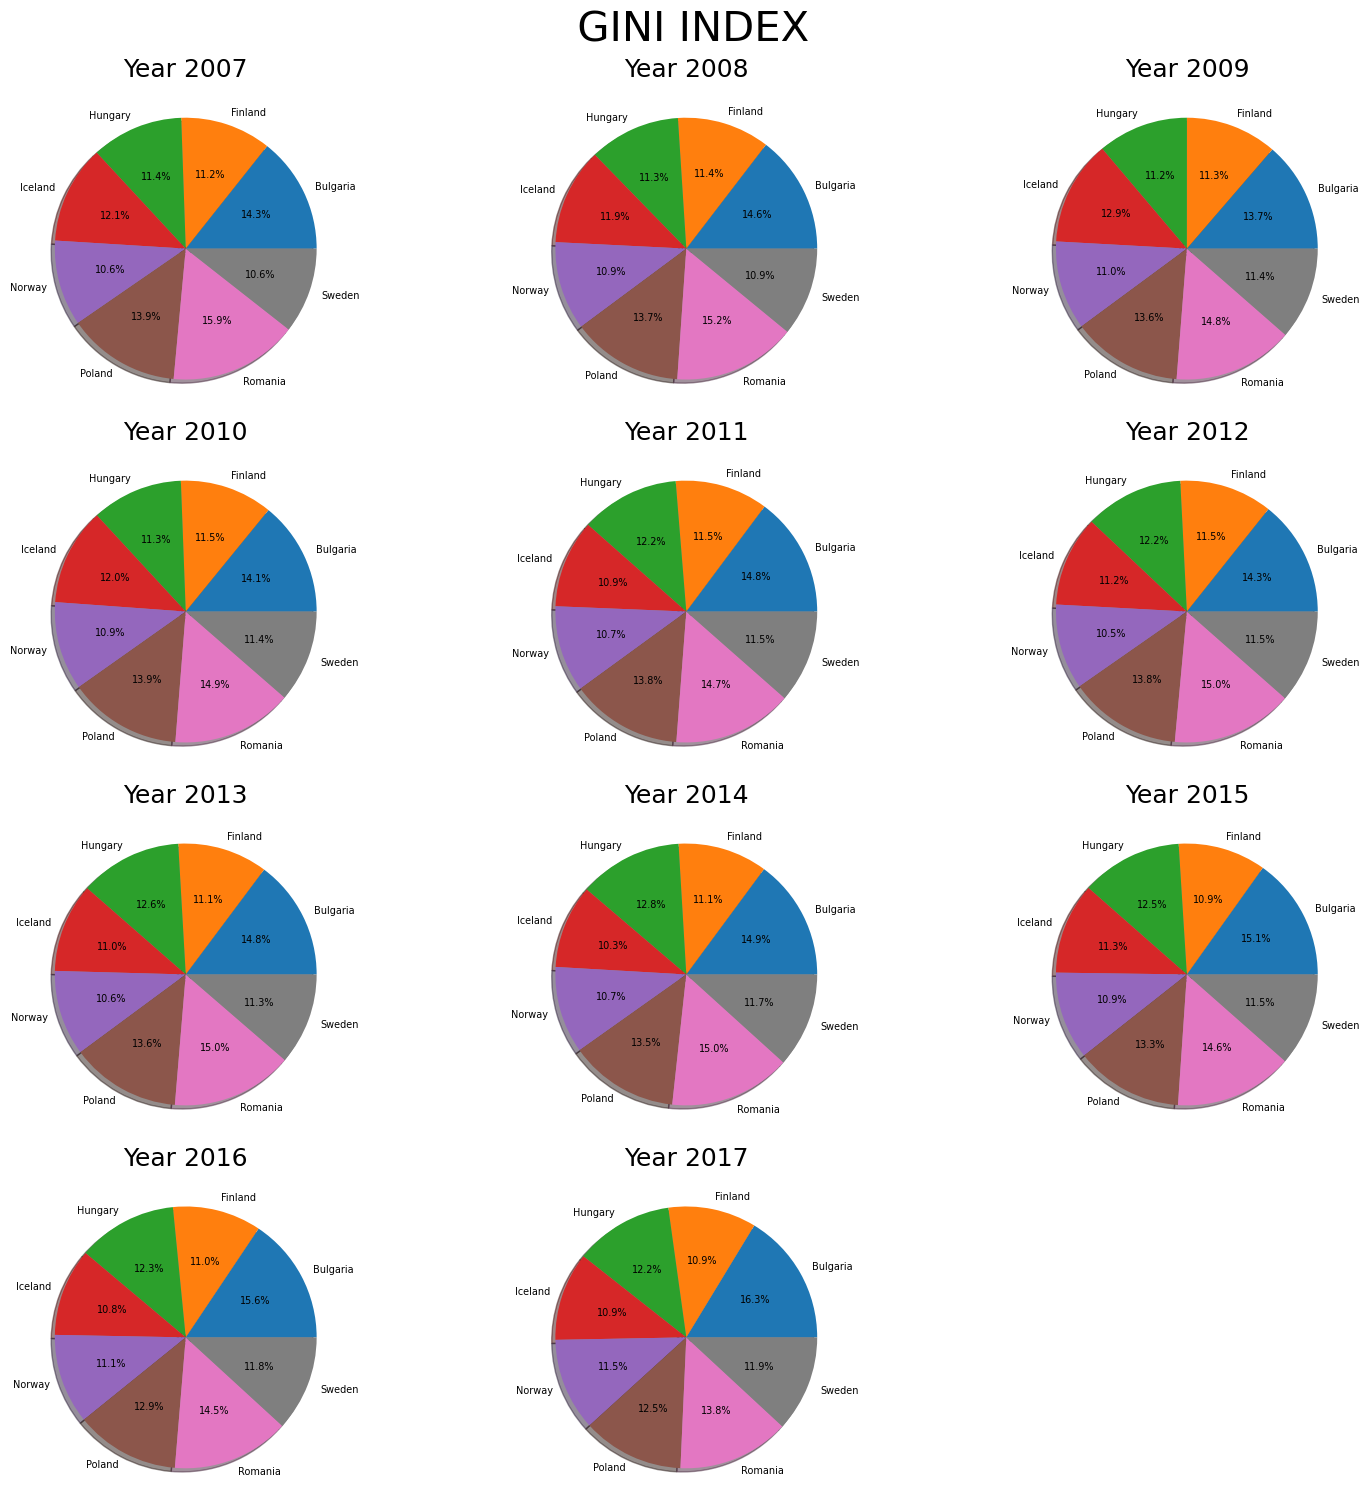

In [362]:
import math
%matplotlib inline
cols = 3
rows = len(gini)
print(rows)
fig, ax = plt.subplots(math.ceil(rows/3), cols, figsize=(15, 15), constrained_layout=True)
fig.suptitle(' GINI INDEX', fontsize=30)
colors = ['orangered', 'chartreuse', 'lightpink', 'steelblue', 'fuchsia', 'deepink', 'darkorange', 'black']
idx = len(gini.index)
x = 0
break_out_flag = False
for row in range(rows):
    for col in range(cols):
        try:
            gini.iloc[x][2:].plot(kind='pie', ax=ax[row, col], autopct='%1.1f%%', fontsize=7, shadow=True)
            #print(x, row, col)
            x += 1
            if x == idx:
                break_out_flag = True
                break
            ax[row, col].set_title('Year {}'.format(gini['Year'].iloc[x]), fontsize=18)
            ax[row, col].set_ylabel('')
            ax[row, col].set_xlabel('')
        except:
            print('Exception', x, row, col)
        if break_out_flag:
            break
    if break_out_flag:
        break
#plt.tight_layout(pad=2.0)
fig.delaxes(ax[3][2])
plt.show()

#for x, row in zip(gini.index, axs.ravel()):
    #fig, ax = plt.subplots(row+1,1)  
    #fig, ax = plt.subplots(1,1)
    #fig.set_size_inches(3,3)
    #print(gini['Year'])
    #gini.iloc[x][2:].plot(kind='pie', ax=ax, autopct='%1.1f%%')   
    #ax.set_title('Year {}'.format(gini['Year'].iloc[x]), fontsize=10)
    #ax.set_ylabel('')
    #ax.set_xlabel('')
    
    
    

### 1. Finns det några möjliga samband mellan inflation, ekonomiska svårigheter och ökade självmordstal? 
### 2. Kan hög inflation eller ekonomiska kriser öka risken för självmord, och om så är fallet, hur ser detta samband ut?
### 3. Hur påverkar ekonomiska faktorer som inflation och arbetslöshet välbefinnandet i ett samhälle? Kan en hög nivå av inflation påverka människors välbefinnande negativt, och i så fall, på vilket sätt?


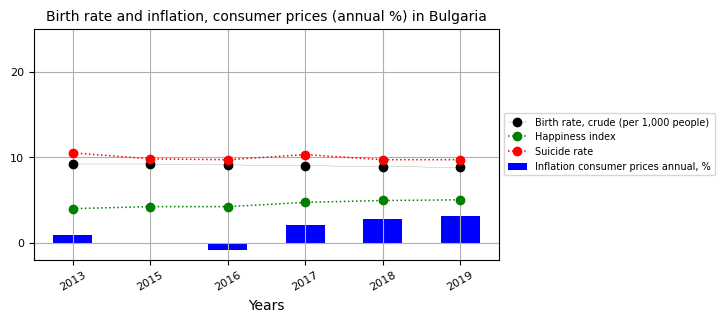

<Figure size 640x480 with 0 Axes>

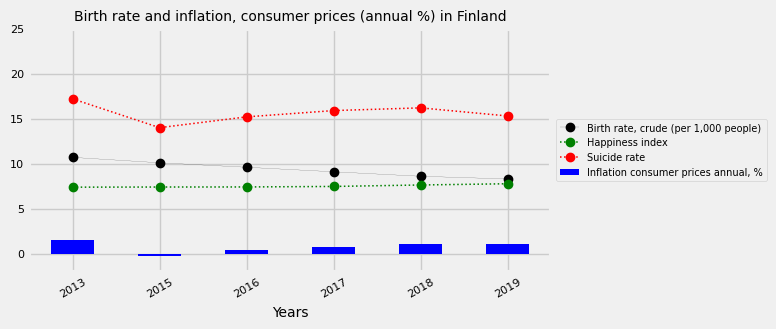

<Figure size 640x480 with 0 Axes>

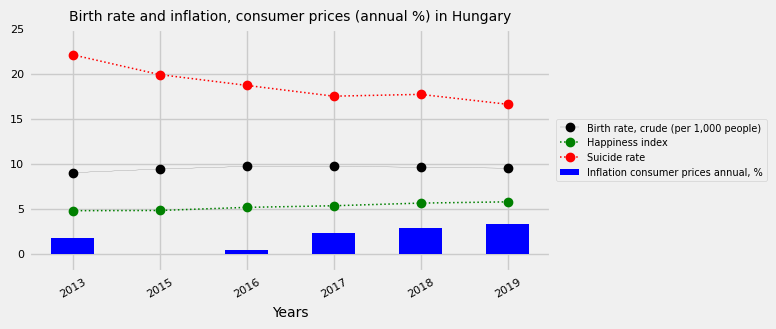

<Figure size 640x480 with 0 Axes>

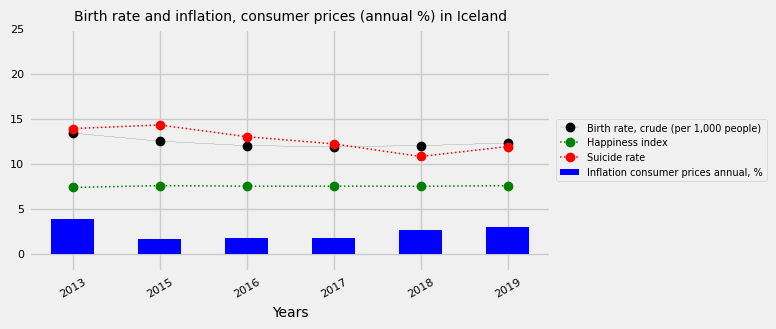

<Figure size 640x480 with 0 Axes>

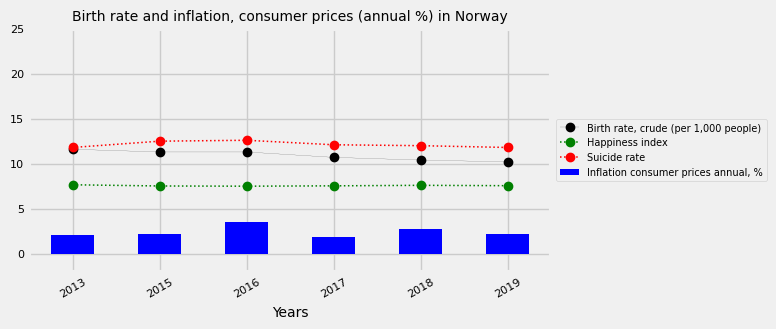

<Figure size 640x480 with 0 Axes>

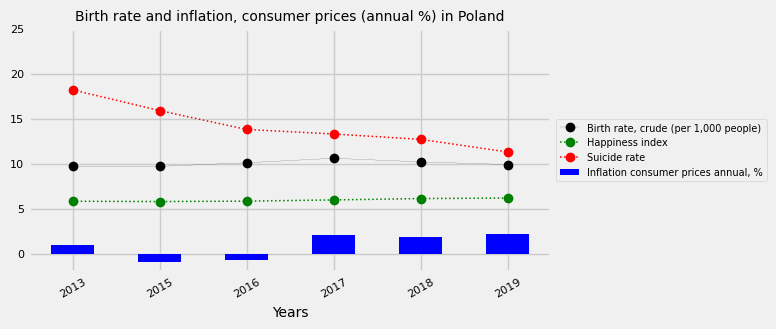

<Figure size 640x480 with 0 Axes>

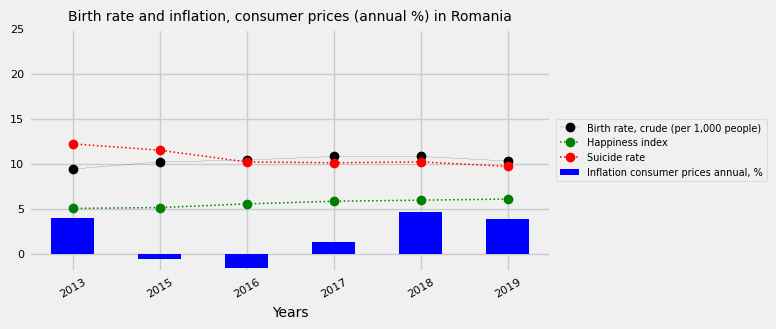

<Figure size 640x480 with 0 Axes>

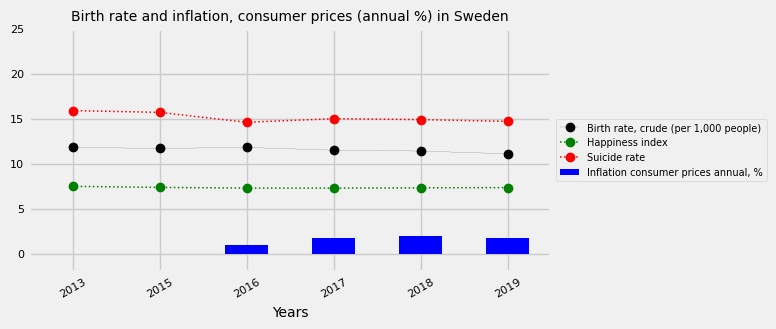

<Figure size 640x480 with 0 Axes>

In [363]:

inflation_and_suicide_rate = {}

for table in dataFrames:
    dataFrames[table]['Year'] = pd.to_datetime(dataFrames[table]['Year'], format='%Y', errors='coerce')
    inflation_and_suicide_rate[table] = (
                               {'Year': dataFrames[table]['Year'],
                                'Inflation': pd.to_numeric(dataFrames[table].Inflation_consumer_pricesannual_precent),
                                'Country': dataFrames[table].Country_Name,
                                'Birth_rate': pd.to_numeric(dataFrames[table].Birth_rate_crudeper_1000_people),
                                'Happiness index': dataFrames[table].Happiness_Index,
                                'Suicide': pd.to_numeric(dataFrames[table].Suicide_mortality_rateper_100000_population)
                               })  
for table in inflation_and_suicide_rate:
    data = pd.DataFrame(inflation_and_suicide_rate[table]).dropna()
    df = data.loc[data['Year'].between('2003', '2022'), ['Year', 'Birth_rate', 'Inflation', 'Happiness index', 'Country', 'Suicide']]
    df['Year'] = df['Year'].dt.to_period('y').astype(str)
    ax = df.plot(x='Year', y = ['Birth_rate'], figsize = (6, 3), ylim=(-2,25), c='black', linestyle='-', marker='o', linewidth=0.1,) #, use_index=False
    df.plot(x = 'Year', y= 'Inflation', kind='bar', linewidth=1.1, color='blue', ax = ax)
    df.plot(x = 'Year', y= 'Happiness index', color='green', ax = ax, linestyle='dotted', linewidth=1.1,  marker='o')
    df.plot(x = 'Year', y= 'Suicide', color='red', ax = ax, linestyle='dotted', linewidth=1.1,  marker='o')

    # Display the chart
    plt.title('Birth rate and inflation, consumer prices (annual %) in {}'.format(df['Country'].iloc[0]), fontsize=10)
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.legend(['Birth rate, crude (per 1,000 people)', 'Happiness index', 'Suicide rate', 'Inflation consumer prices annual, %'], fontsize=7, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlabel('Years', fontsize=10)
    matplotlib.style.use('fivethirtyeight')
    plt.grid(True)
    plt.show()
    plt.figure()


### 1. Kan vi identifiera några mönster i hur arbetslöshet, ekonomisk tillväxt och lycklighet är relaterade till varandra? 
### 2. Hur påverkar arbetslöshet och ekonomisk tillväxt landets övergripande välmående som mäts genom Happiness Index?
### 3. Hur påverkas arbetslösheten (Unemployment total percent of total labor force national estimate) av landets ekonomiska tillväxt (GDP growth annual percent), och finns det några signifikanta samband mellan dessa två variabler?

In [364]:
unemploy_and_gdp_growth ={}

for table in dataFrames:
    dataFrames[table]['Year'] = pd.to_datetime(dataFrames[table]['Year'], format='%Y', errors='coerce')
    unemploy_and_gdp_growth[table] = (
                               {'Year': dataFrames[table]['Year'],
                                'Unemployment_total':pd.to_numeric(dataFrames[table].Unemployment_total_precent_of_total_labor_forcenational_estimate),
                                'Unemployment_female': pd.to_numeric(dataFrames[table].Unemployment_female_precent_of_female_labor_forcenational_estimate),
                                'Unemployment_male': pd.to_numeric(dataFrames[table].Unemployment_male_precent_of_male_labor_forcenational_estimate),
                                'GDP_growth': pd.to_numeric(dataFrames[table].GDP_growthannual_precent),
                                'Country': dataFrames[table].Country_Name,
                                'Happiness': dataFrames[table].Happiness_Index
                               })    

#### Visualize gdp_growth vs unemployment

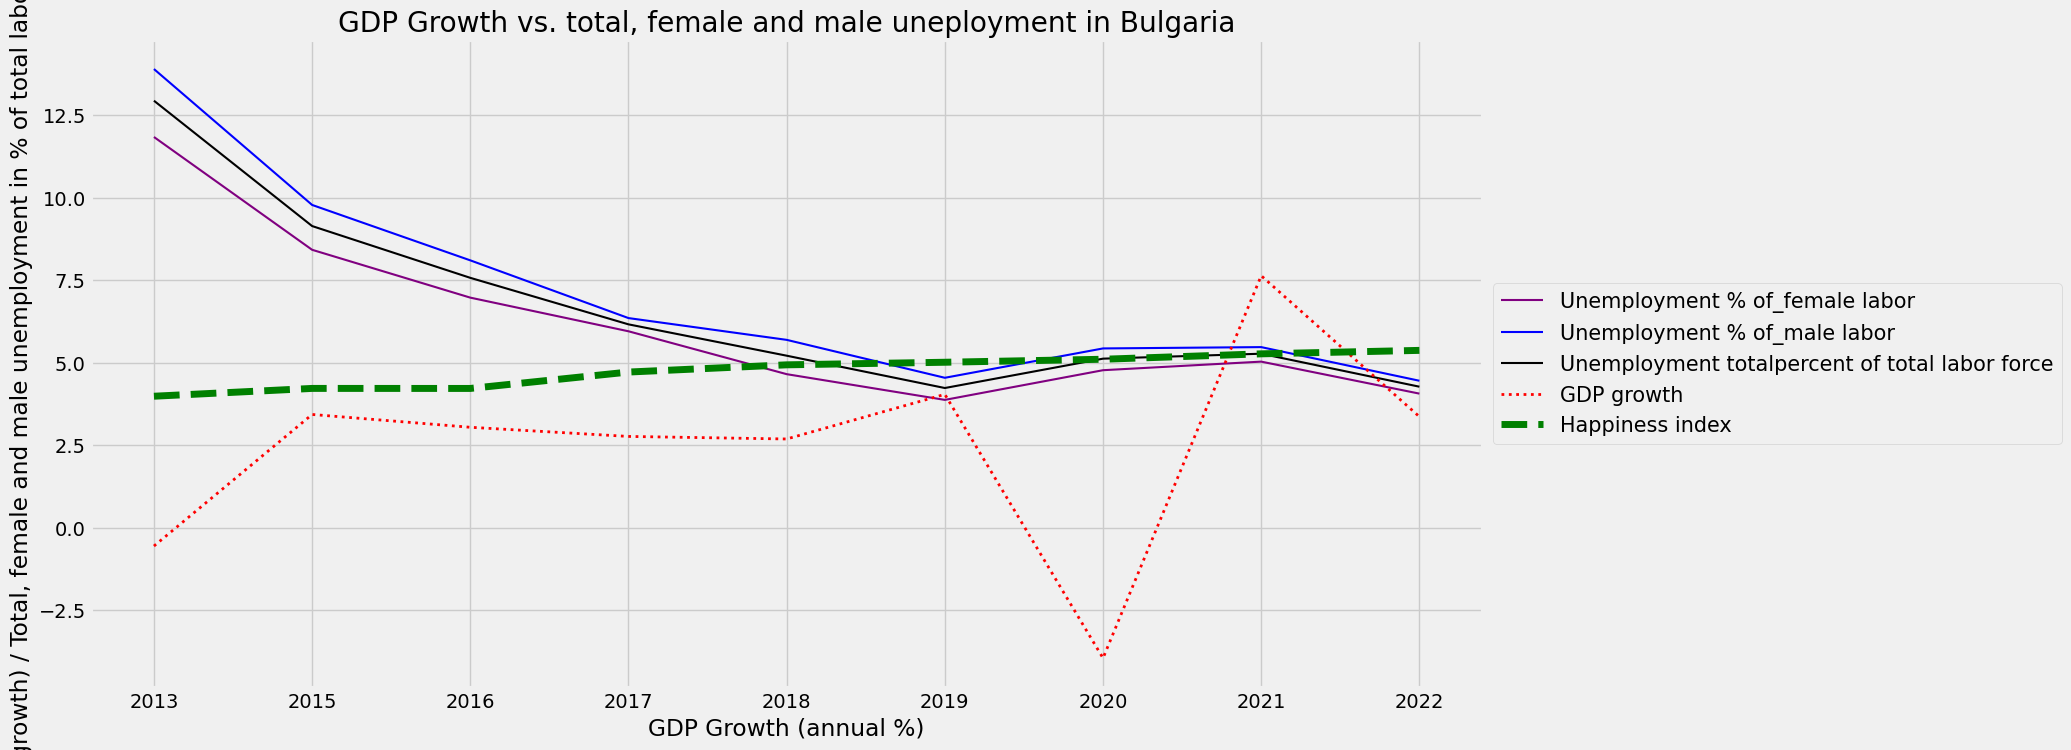

<Figure size 640x480 with 0 Axes>

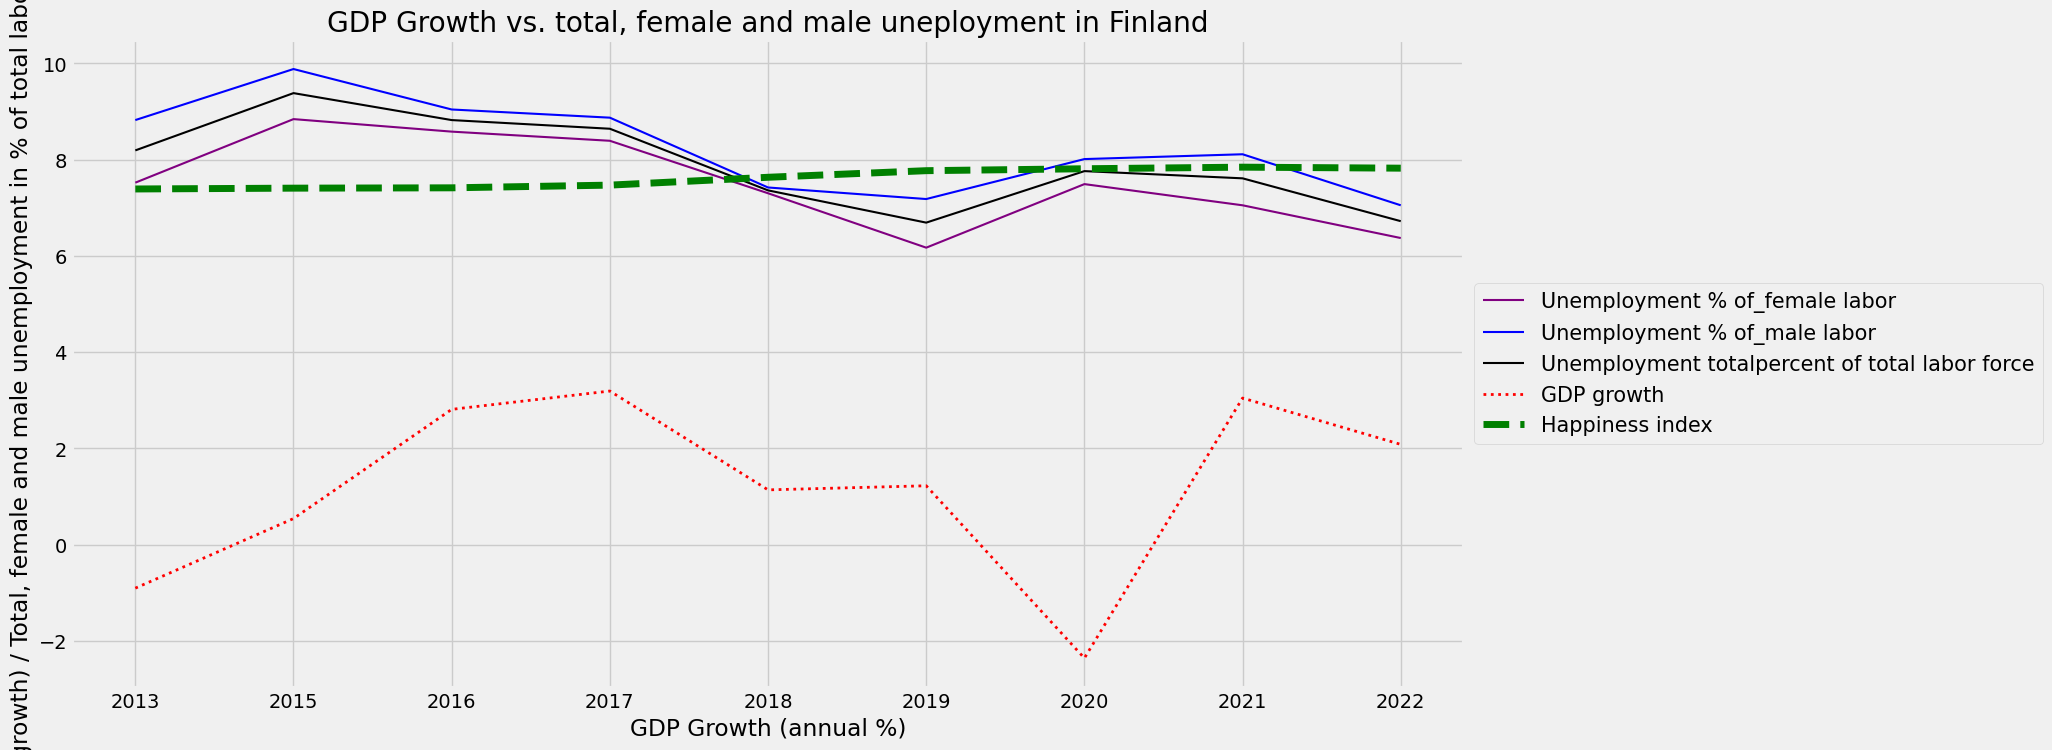

<Figure size 640x480 with 0 Axes>

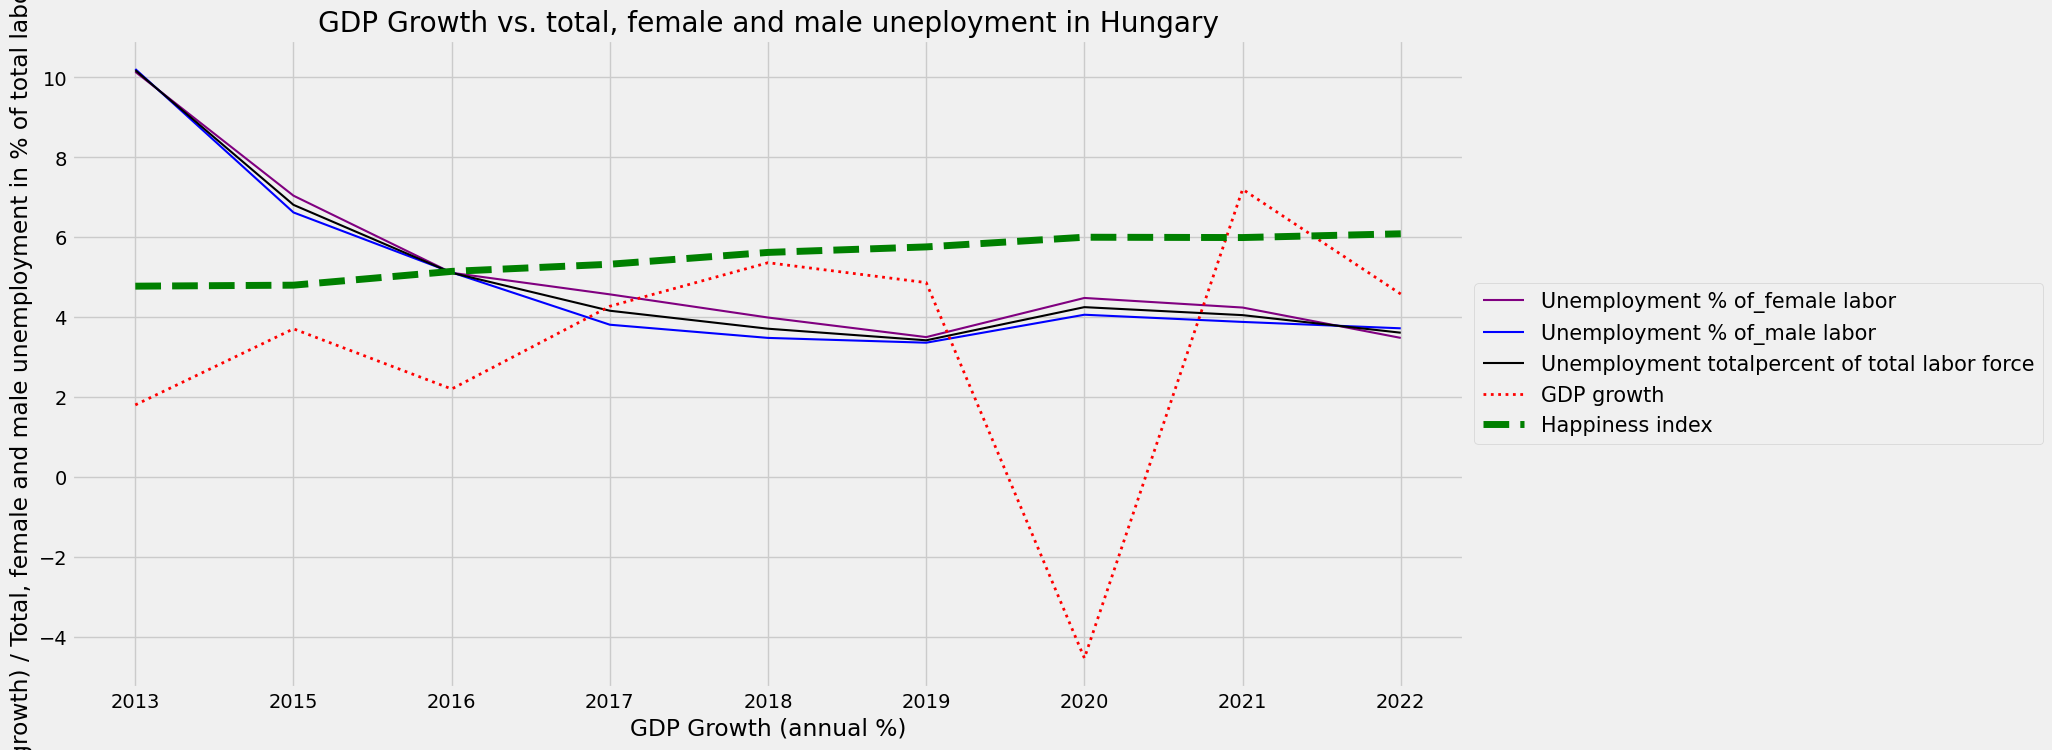

<Figure size 640x480 with 0 Axes>

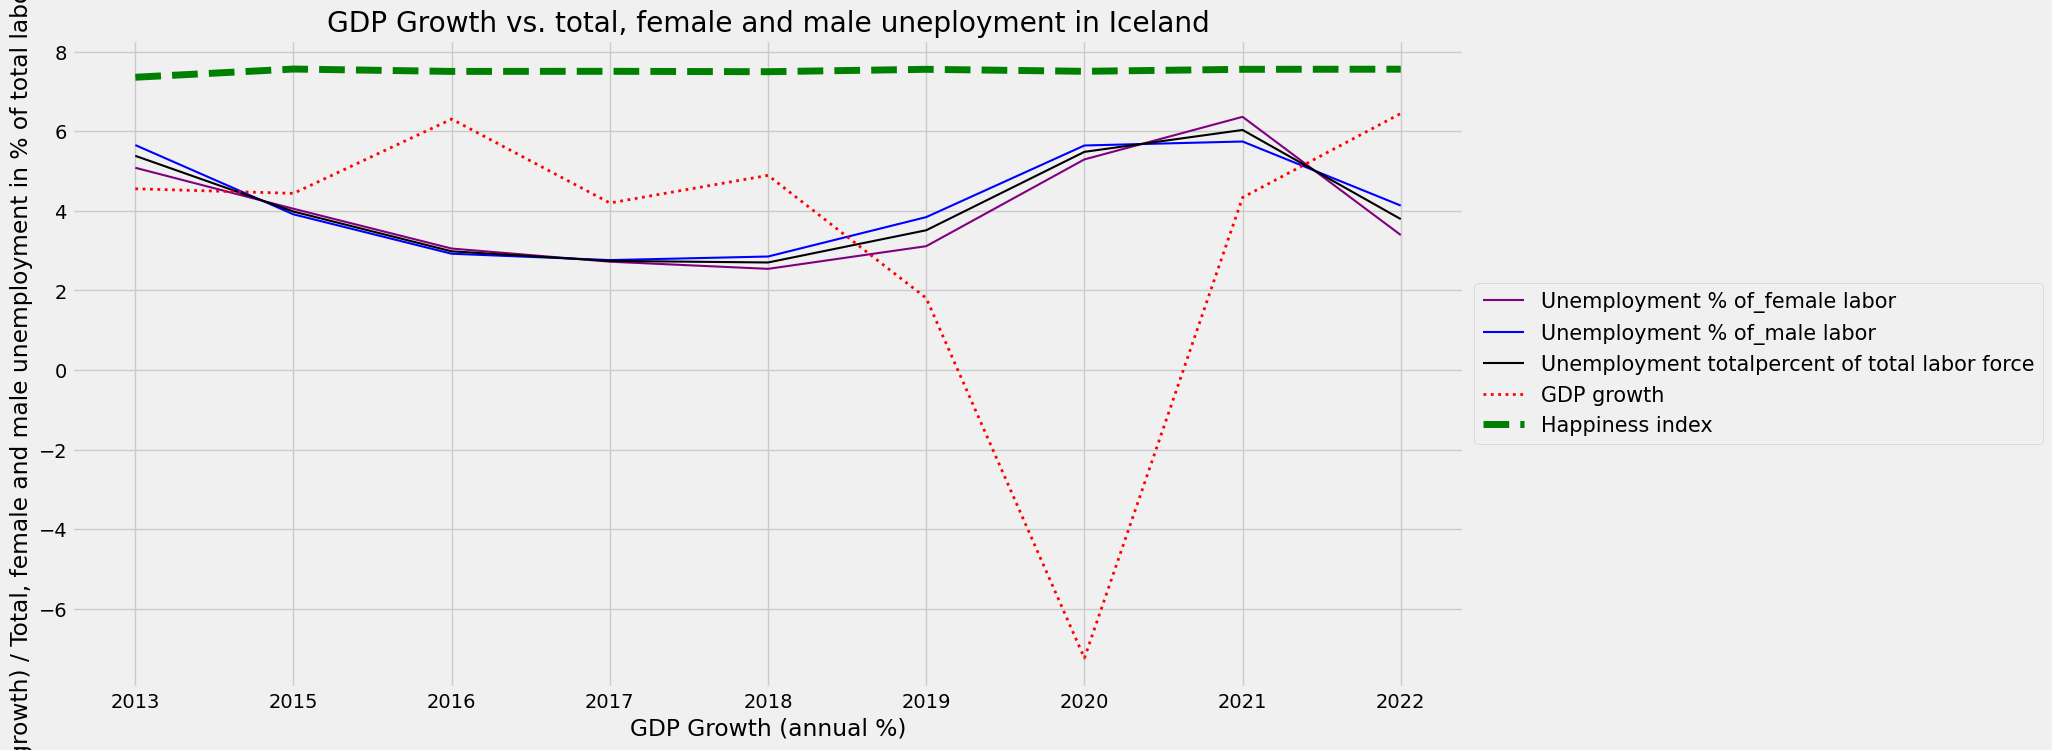

<Figure size 640x480 with 0 Axes>

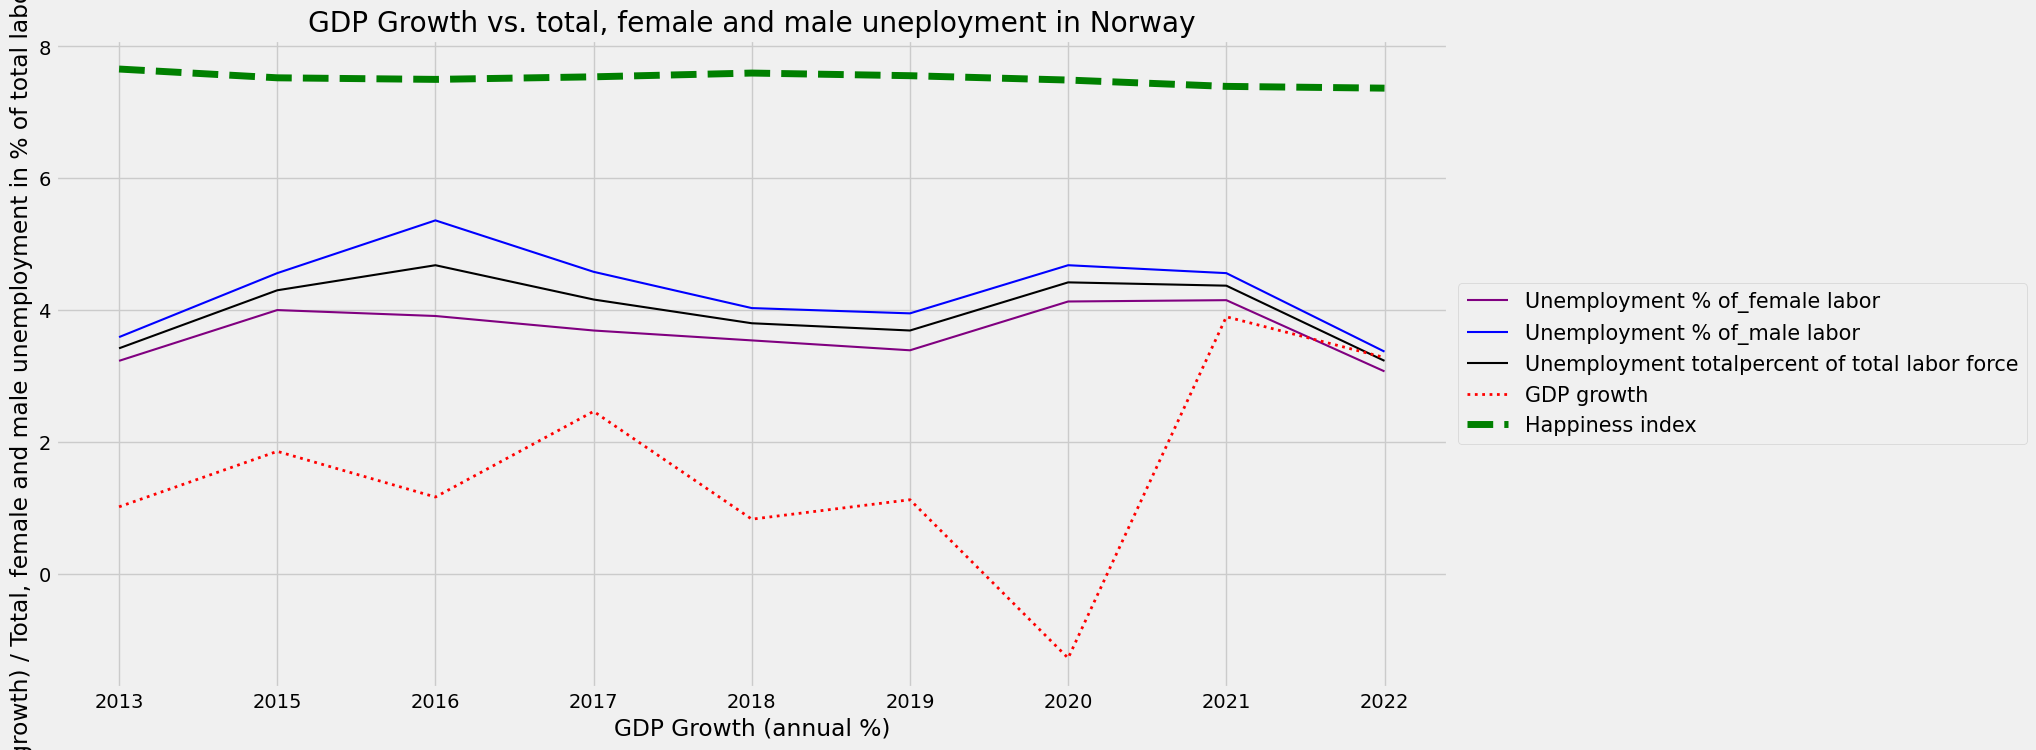

<Figure size 640x480 with 0 Axes>

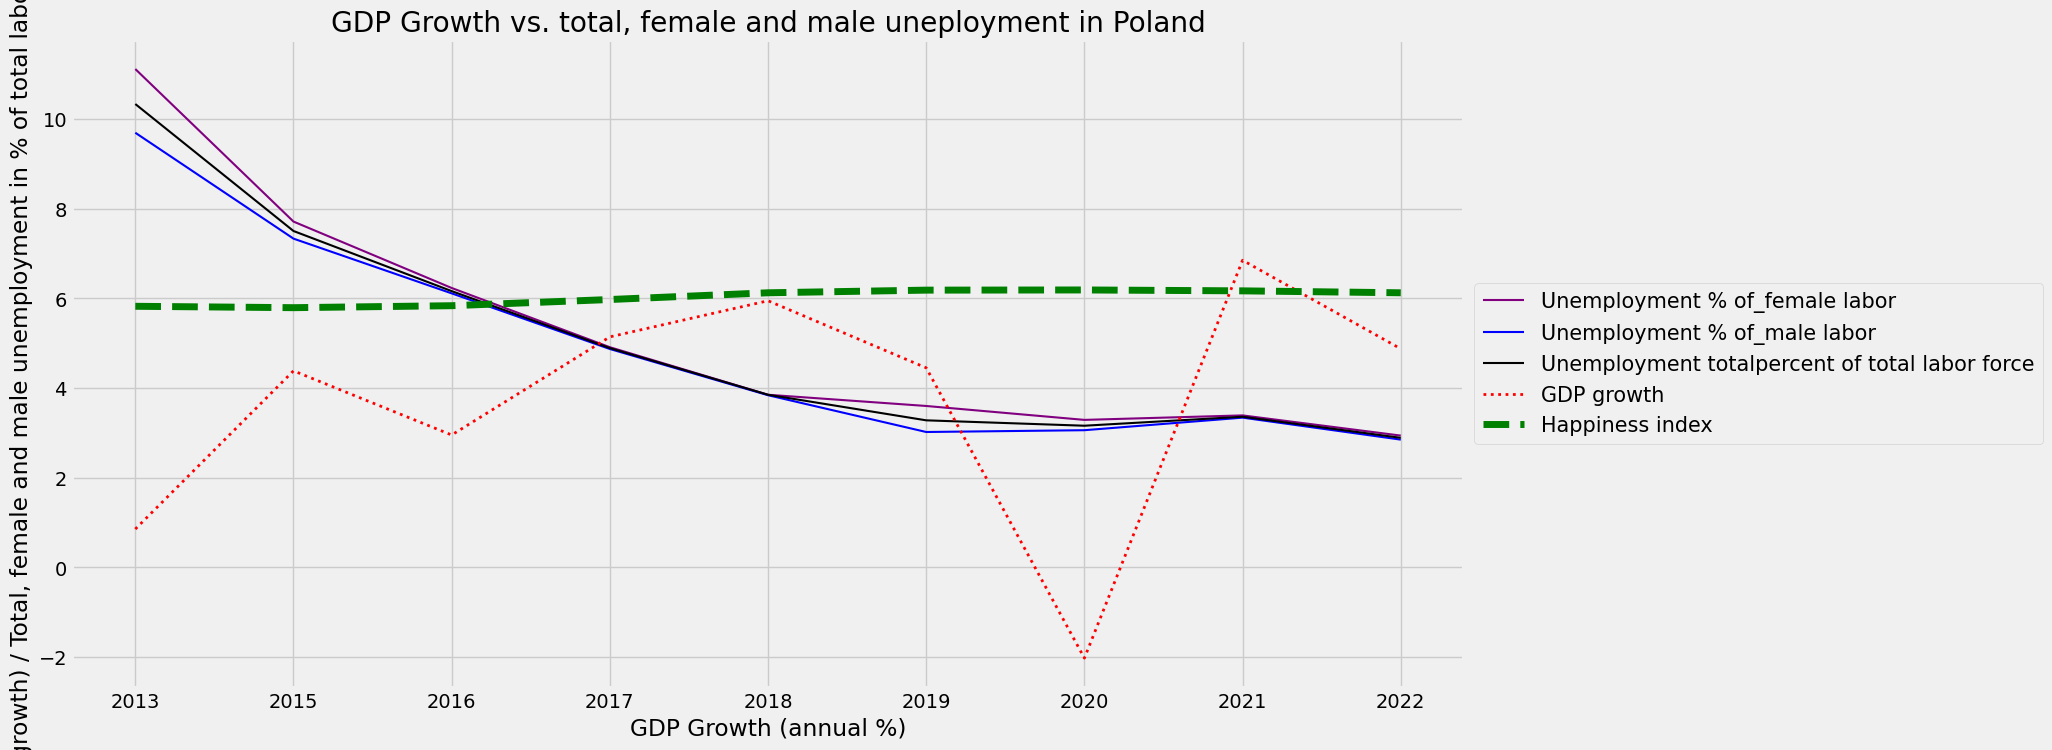

<Figure size 640x480 with 0 Axes>

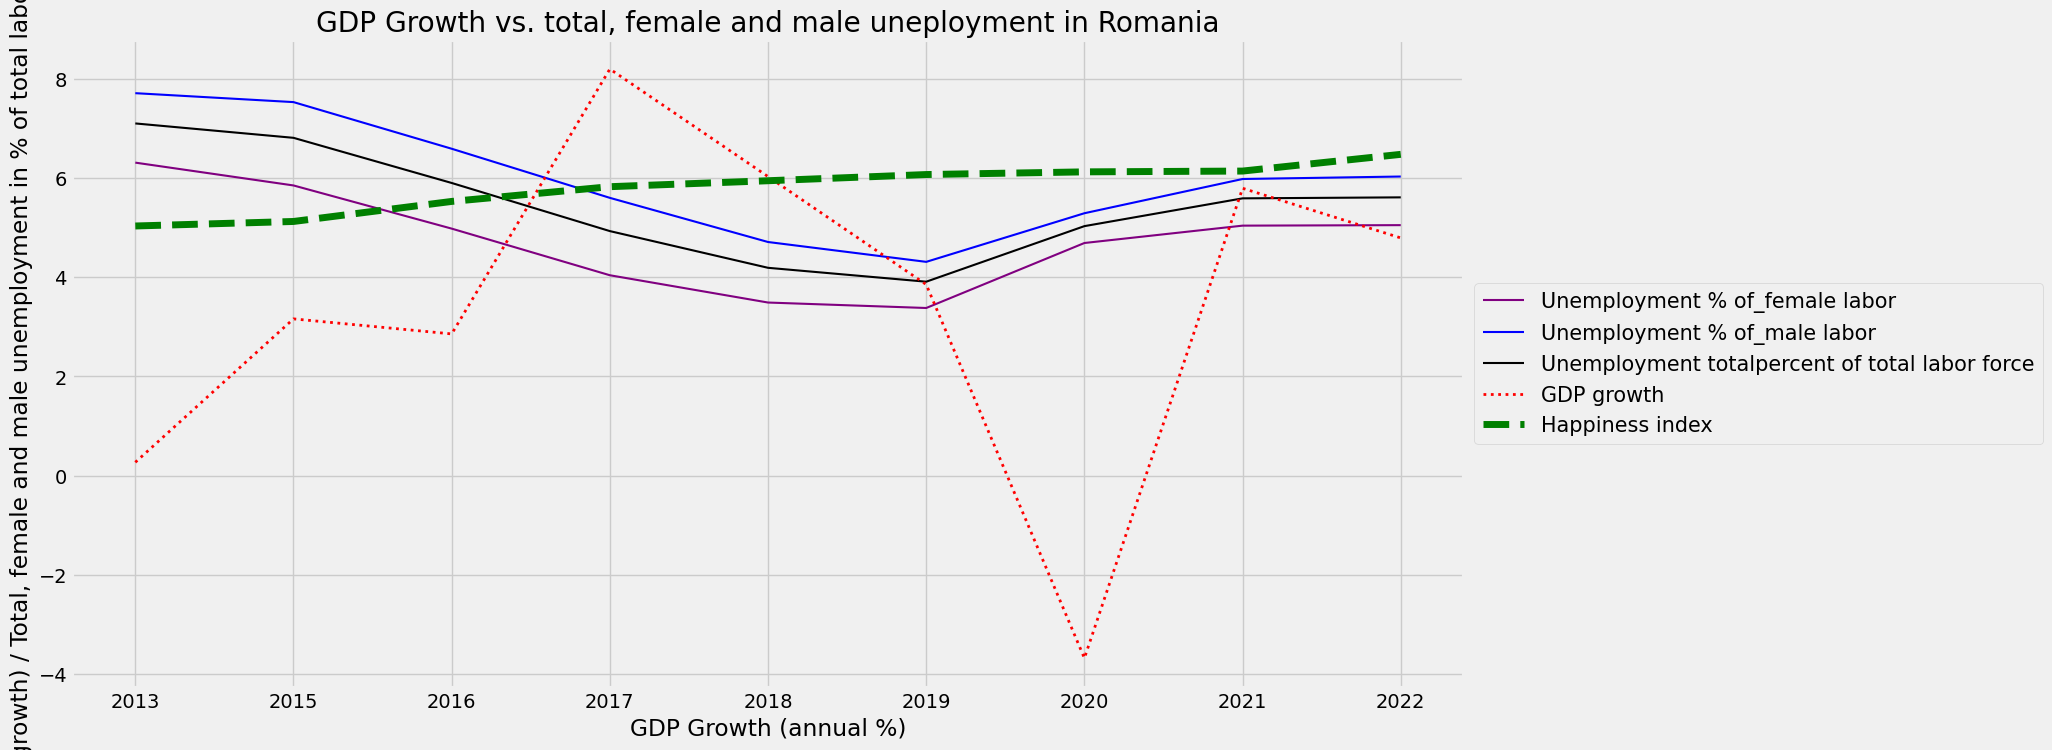

<Figure size 640x480 with 0 Axes>

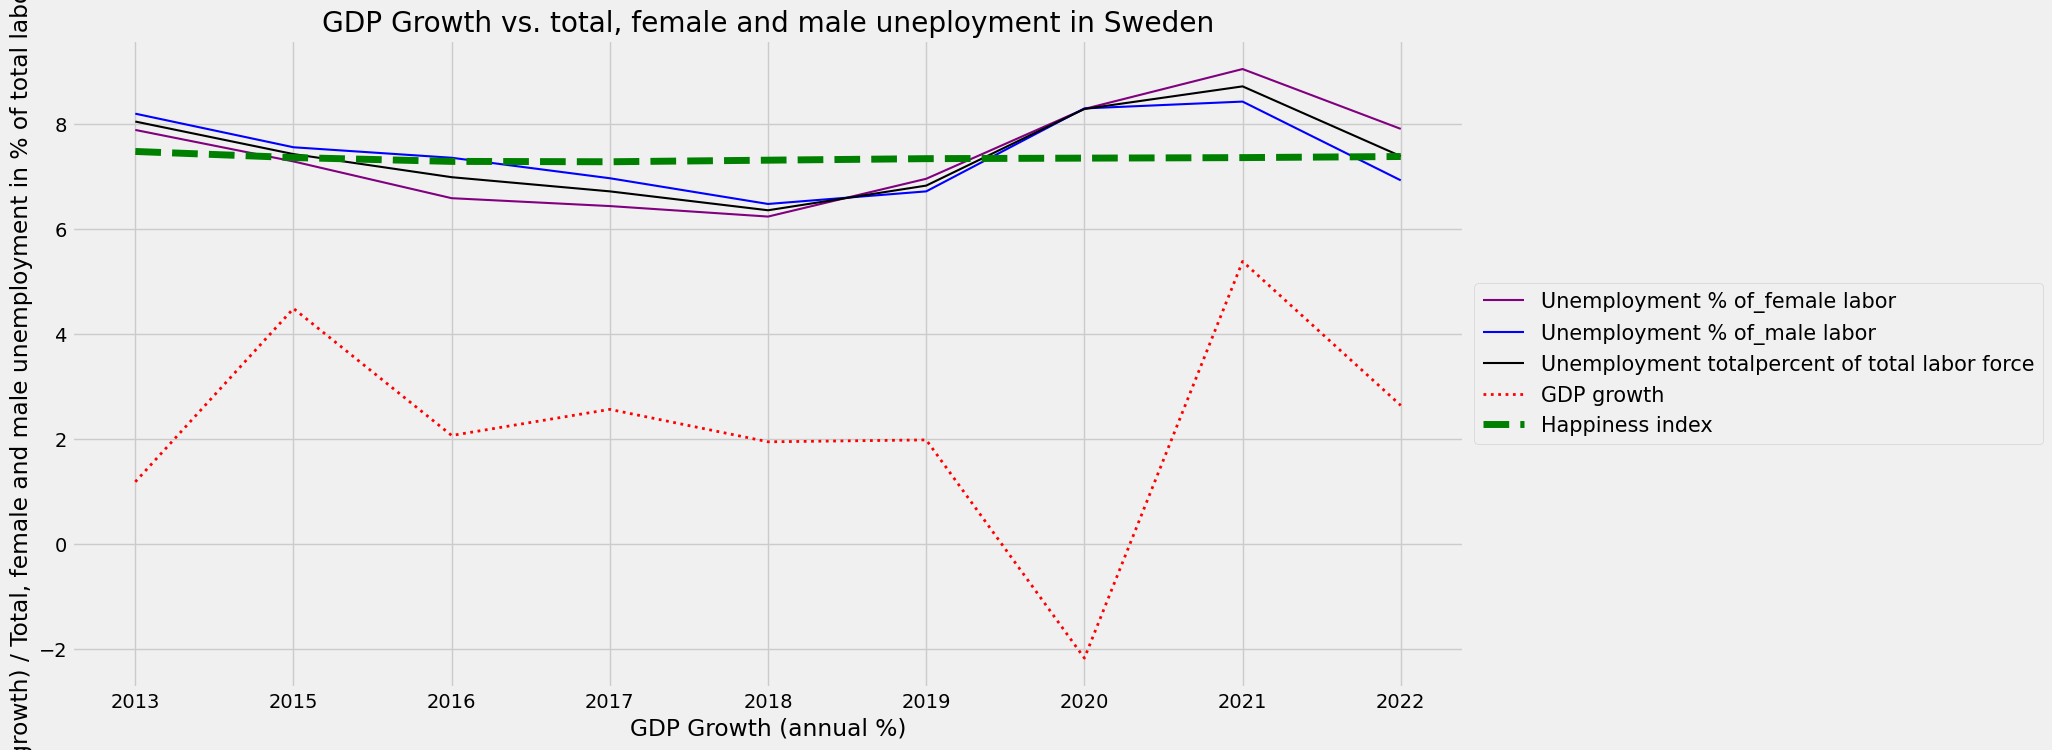

<Figure size 640x480 with 0 Axes>

In [365]:

for table in unemploy_and_gdp_growth:
    # Sample data (replace this with your data)
    data = {
        'GDP growth': unemploy_and_gdp_growth[table]['GDP_growth'],
        'Unemployment female': unemploy_and_gdp_growth[table]['Unemployment_female'],
        'Unemployment male': unemploy_and_gdp_growth[table]['Unemployment_male'],
        'Unemployment total': unemploy_and_gdp_growth[table]['Unemployment_total'],
        'Years': unemploy_and_gdp_growth[table]['Year'],
        'Country': unemploy_and_gdp_growth[table]['Country'],
        'Happiness': unemploy_and_gdp_growth[table]['Happiness']
    }
    
    
   # Create a DataFrame from the data
    df = pd.DataFrame(data).dropna()
    df = df.loc[df['Years'].between('2002', '2022'), ['GDP growth', 'Years', 'Happiness', 'Unemployment female', 'Unemployment male', 'Unemployment total', 'Country']]
    df['Years'] = df['Years'].dt.to_period('y').astype(str)
    # Create a scatter plot
    plt.figure(figsize=(16, 8))
    plt.plot(df['Years'], df['Unemployment female'], c='purple', label='Unemployment % of_female labor', linewidth=1.5)
    plt.plot(df['Years'], df['Unemployment male'], c='blue', label='Unemployment % of_male labor', linewidth=1.5)
    plt.plot(df['Years'], df['Unemployment total'], c='black', label='Unemployment totalpercent of total labor force', linewidth=1.5)
    plt.plot(df['Years'], df['GDP growth'], c='red', label='GDP growth', linestyle='dotted', linewidth=2)
    plt.plot(df['Years'], df['Happiness'], c='green', label='Happiness index', linestyle='dashed', linewidth=5)
    # Customize the chart
    plt.title('GDP Growth vs. total, female and male uneployment in {}'.format(df['Country'].iloc[0]))
    plt.xlabel('GDP Growth (annual %)')
    plt.ylabel('GDP growth) / Total, female and male unemployment in % of total labor force')
    plt.legend(loc='center left', prop={'size': 15}, bbox_to_anchor=(1.0, 0.5))
    
    # Display the chart
    plt.grid(True)
    plt.show()
    plt.figure()


In [ ]:
### Hur påverkar utbildningsnivåerna (Advanced education, Intermediate education och Basic education) 
### arbetslösheten och födelsetalen (Birth rate) i en befolkning? Vi utforskar om arbetslöshet i olika 
### utbildningsgrupper kan relateras till födelsetal och om det finns något samband mellan utbildningsnivåer, sysselsättning och befolkningsökning.

In [366]:
unemployment_and_education_level = {}

for table in dataFrames:
    dataFrames[table]['Year'] = pd.to_datetime(dataFrames[table]['Year'], format='%Y', errors='coerce')
    unemployment_and_education_level[table] = (
                               {'Year':  dataFrames[table]['Year'],
                                'Advanced_education':pd.to_numeric(dataFrames[table].Unemployment_with_advanced_education_precent_of_total_labor_force_with_advanced_education),
                                'Intermediate_education': pd.to_numeric(dataFrames[table].Unemployment_with_intermediate_education_precent_of_total_labor_force_with_intermediate_education),
                                'Basic_education': pd.to_numeric(dataFrames[table].Unemployment_with_basic_education_precent_of_total_labor_force_with_basic_education),
                                'Country': dataFrames[table].Country_Name,
                                'Birth_rate':  pd.to_numeric(dataFrames[table].Birth_rate_crudeper_1000_people)
                               }) 

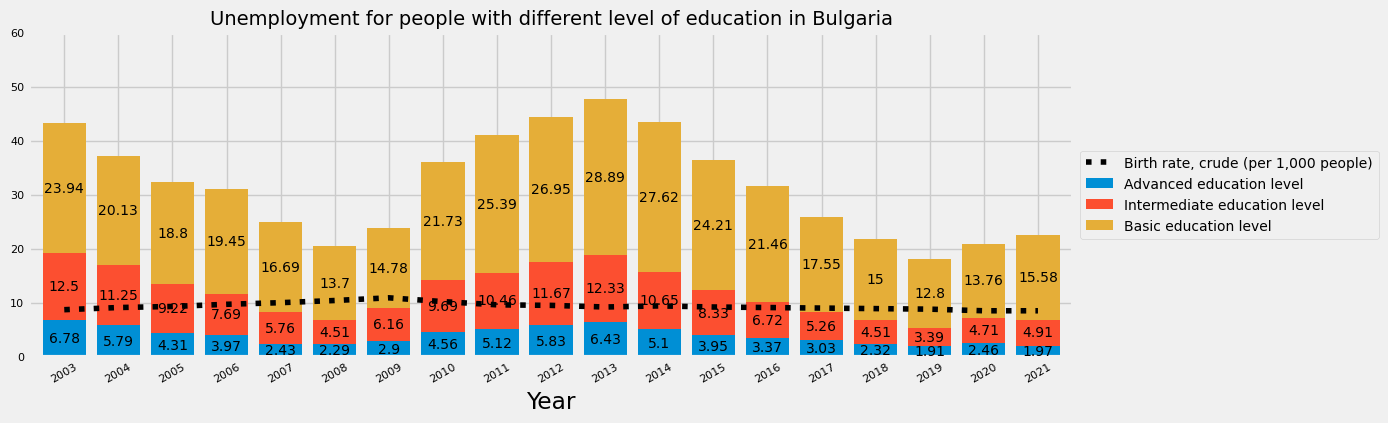

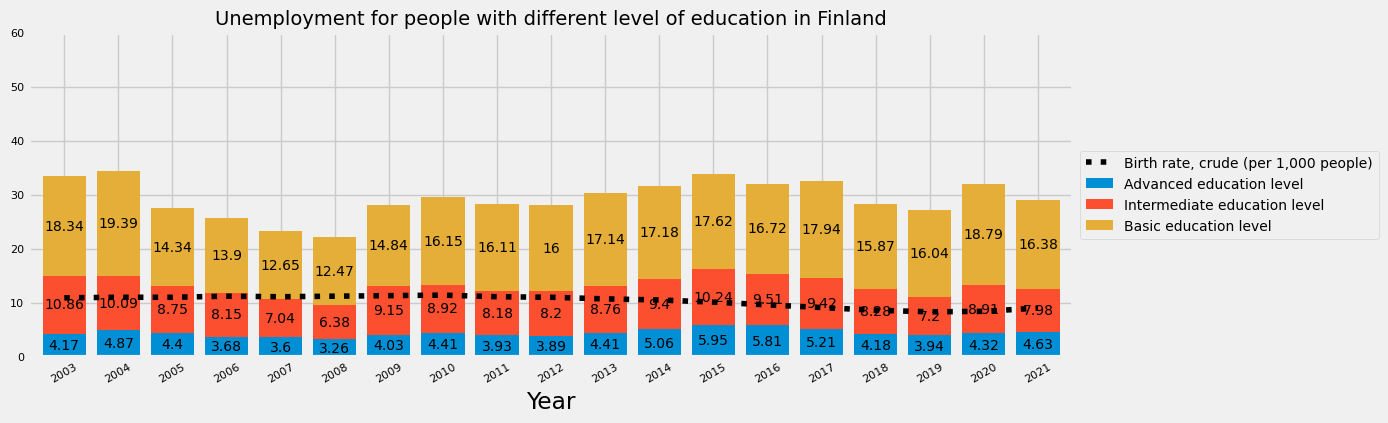

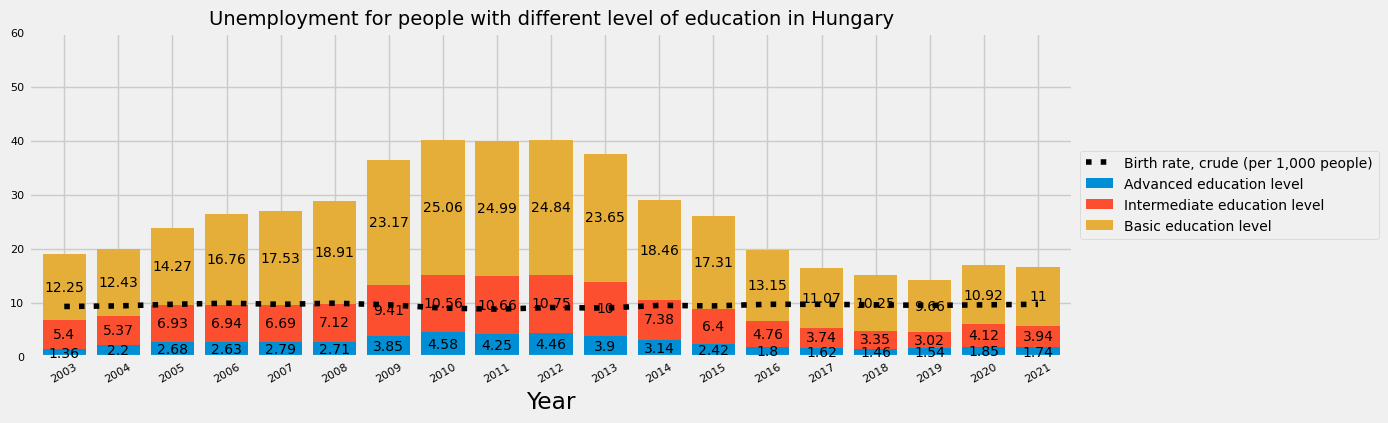

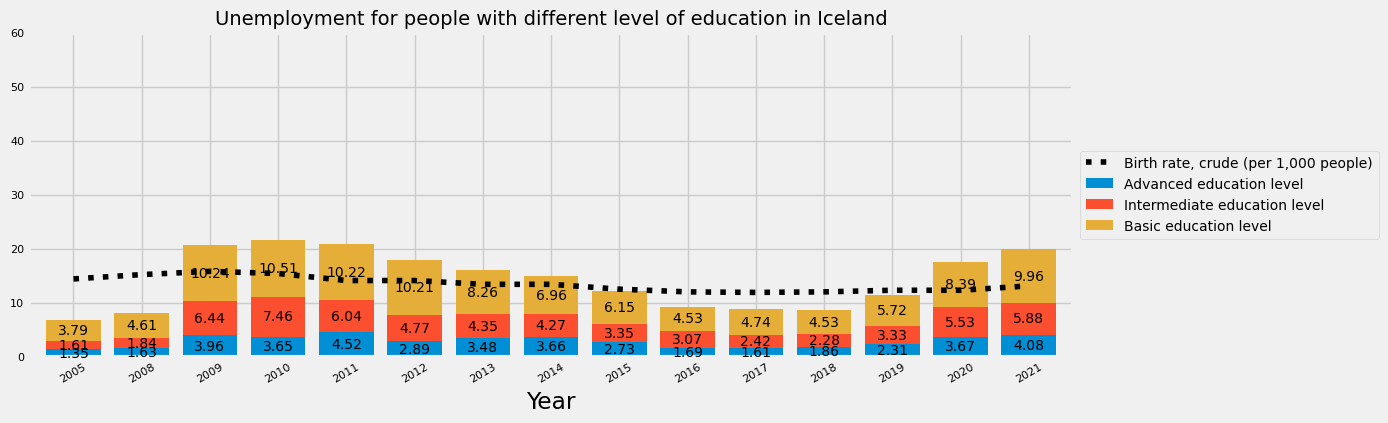

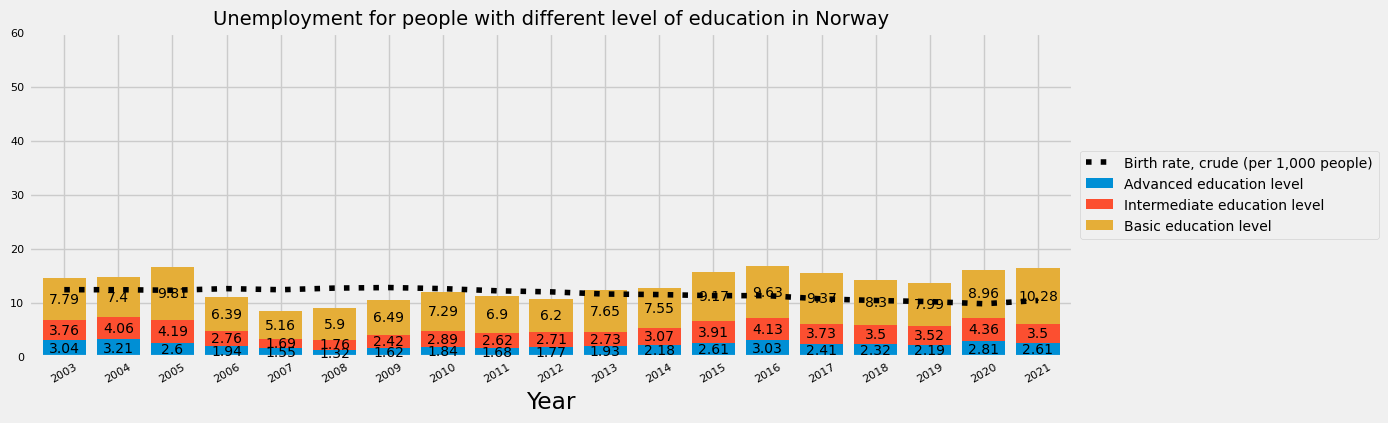

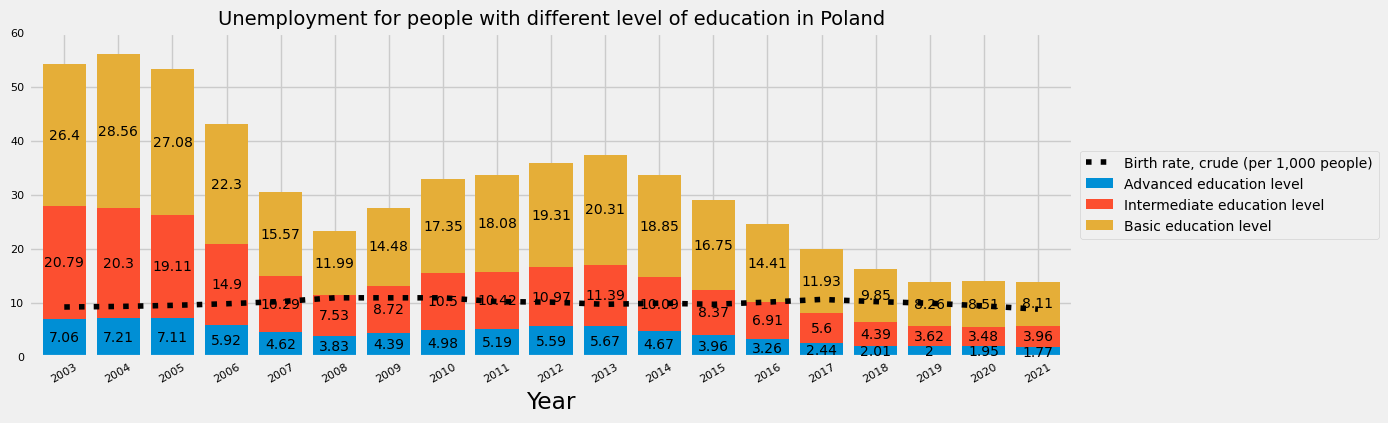

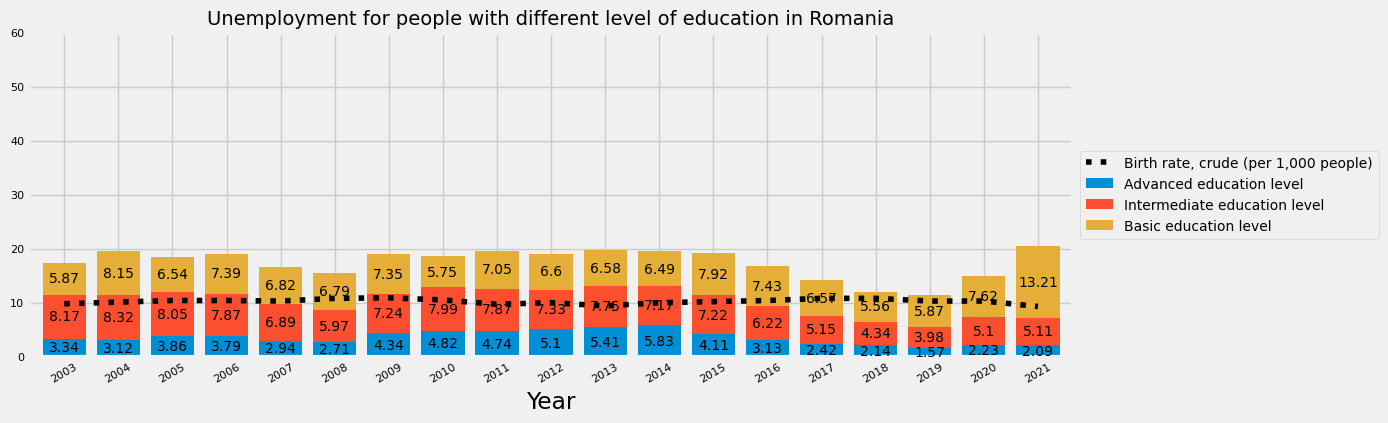

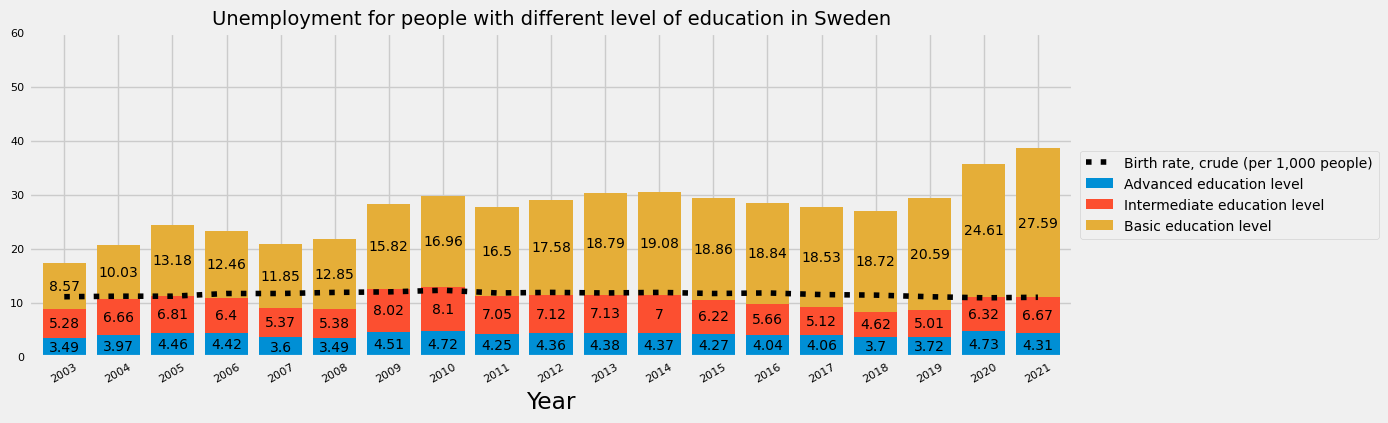

In [367]:
for table in unemployment_and_education_level:
    data = pd.DataFrame(unemployment_and_education_level[table]).dropna()
    df = data.loc[data['Year'].between('2003', '2022'), ['Year', 'Birth_rate', 'Advanced_education', 'Intermediate_education', 'Basic_education', 'Country']]
    df['Year'] = df['Year'].dt.to_period('y').astype(str)
    ax = df.plot(x='Year', y = 'Birth_rate', c='black', linestyle='dotted', linewidth=4)
    barplot = df.plot(x='Year', y = ['Advanced_education', 'Intermediate_education', 'Basic_education'], ax=ax, kind = 'bar', width = 0.8, stacked=True, figsize = (12, 4), ylim=(0, 60))
    plt.title("Unemployment for people with different level of education in {}".format(df['Country'].iloc[0]), fontsize=14)
    for container in barplot.containers:
        barplot.bar_label(container, label_type='center', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.legend(['Birth rate, crude (per 1,000 people)', 'Advanced education level', 'Intermediate education level', 'Basic education level'], prop={'size': 10}, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


In [ ]:
#  hur den procentuella andelen av BNP som spenderas på hälso- och sjukvård, den årliga procentuella tillväxten 
# av det justerade nettonationalinkomst per capita och andelen egna utgifter i förhållande till de totala hälso- och 
# sjukvårdsutgifterna kan relateras till varandra och eventuella mönster som kan påverka ekonomisk tillväxt och 
# tillgänglighet till vårdtjänster i olika länder. 
# Hur påverkar dessa faktorer varandras dynamik och vad kan det avslöja om den övergripande hälsoekonomin?

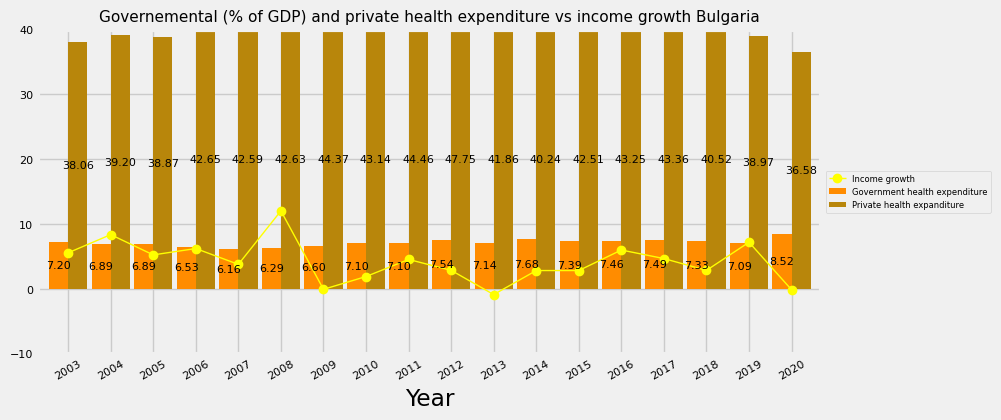

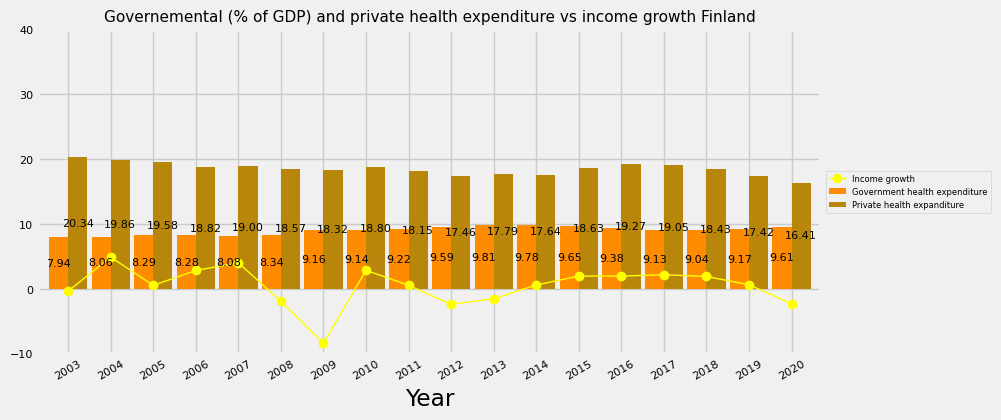

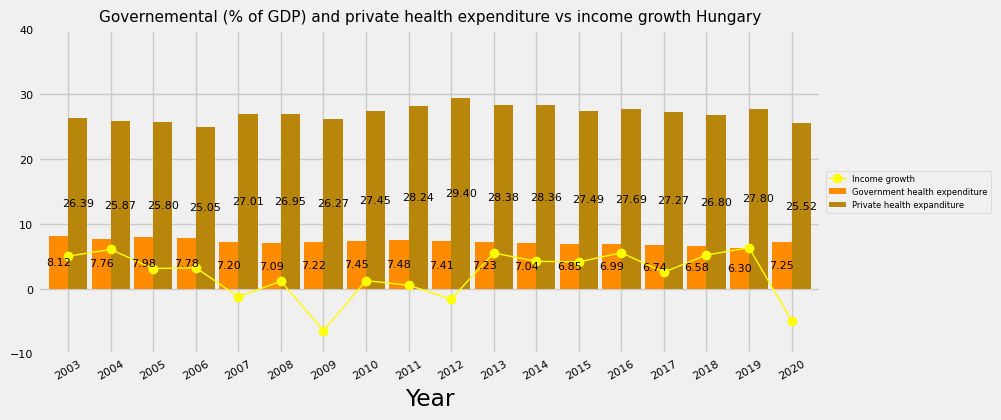

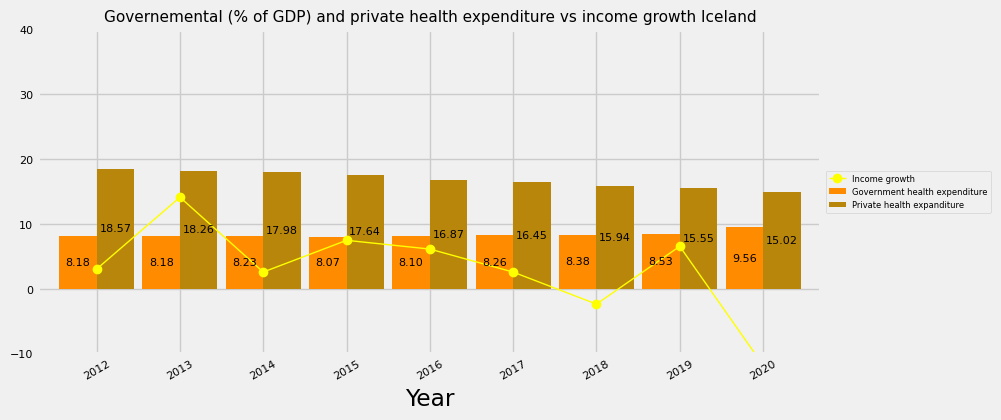

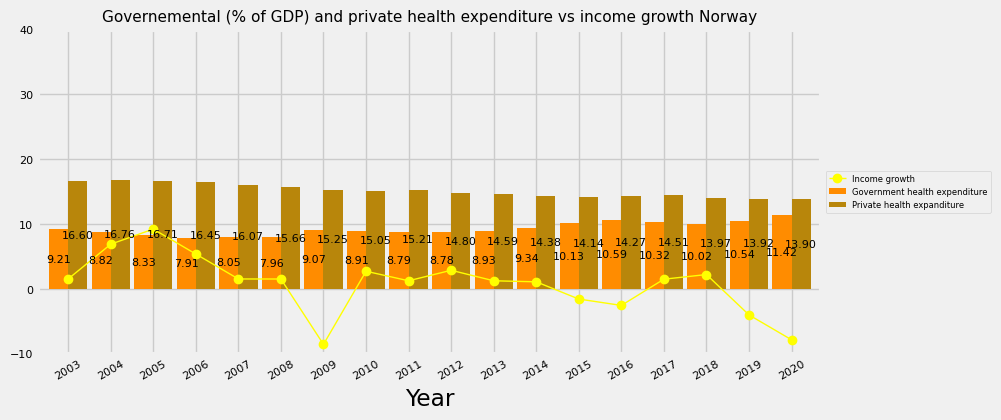

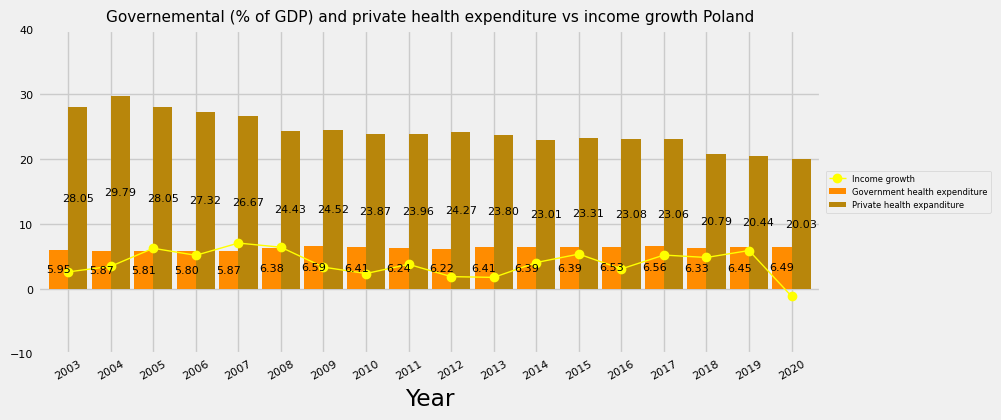

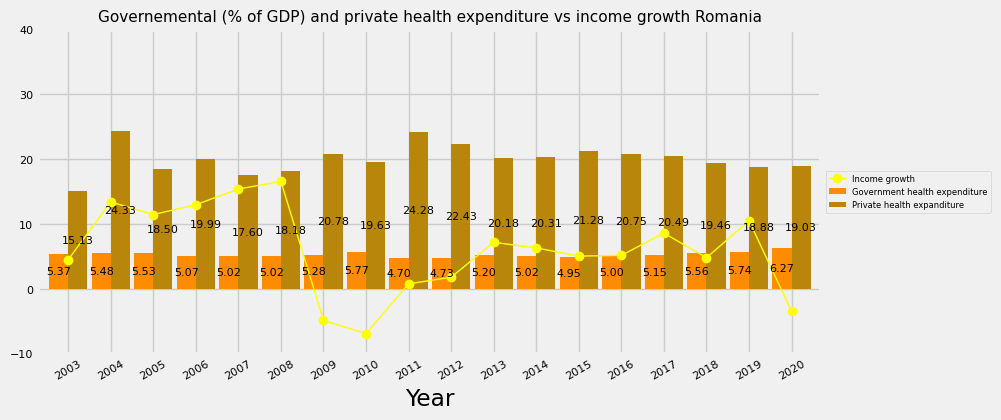

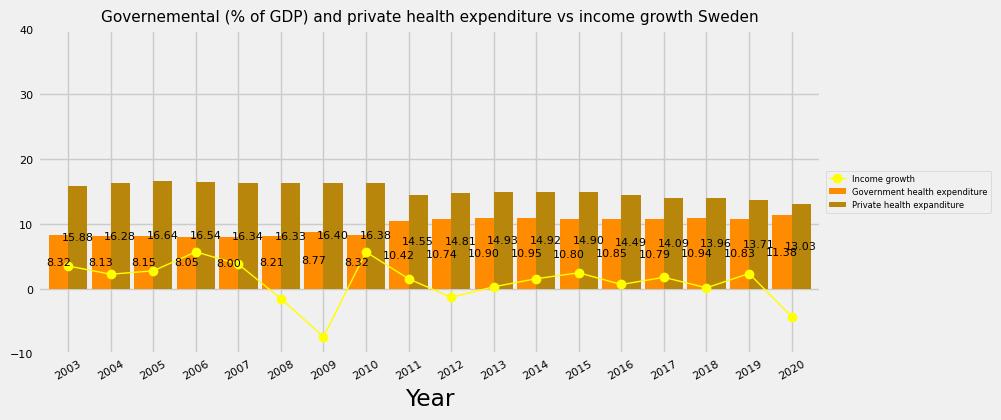

In [372]:
incomes_and_lifexpactancy_health_happiness ={}

for table in dataFrames:
    dataFrames[table]['Year'] = pd.to_datetime(dataFrames[table]['Year'], format='%Y', errors='coerce')
    incomes_and_lifexpactancy_health_happiness[table] = (
                               {'Year': dataFrames[table]['Year'],
                                'Government health expenditure': pd.to_numeric(dataFrames[table].Current_health_expenditure_precent_of_GDP),
                                'Country': dataFrames[table].Country_Name,
                                'Income growth': pd.to_numeric(dataFrames[table].Adjusted_net_national_income_per_capitaannual_precent_growth),
                                'Population_above_80_female': pd.to_numeric(dataFrames[table].Population_ages_80_and_above_female_precent_of_female_population),
                                'Population_above_80_male': pd.to_numeric(dataFrames[table].Population_ages_80_and_above_male_precent_of_male_population),
                                'Private health expanditure': pd.to_numeric(dataFrames[table].Out_of_pocket_expenditure_precent_of_current_health_expenditure)
                               })  
for table in incomes_and_lifexpactancy_health_happiness:
    data = pd.DataFrame(incomes_and_lifexpactancy_health_happiness[table]).dropna()
    df = data.loc[data['Year'].between('2003', '2022'), ['Year', 'Government health expenditure', 'Income growth', 'Population_above_80_male', 'Country', 'Private health expanditure']]
    df['Year'] = df['Year'].dt.to_period('y').astype(str)
    ax = df.plot(x='Year', y = ['Income growth'], figsize = (9, 4), c='yellow', ylim=(-10,40), linestyle='-', marker='o', linewidth=1,) #, use_index=False
    barplot = df.plot(x = 'Year', y= ['Government health expenditure', 'Private health expanditure'], kind='bar', width=0.9, linewidth=1.1, color=['darkorange', 'darkgoldenrod', 'darkblue'], ax = ax)
    for container in barplot.containers:
        barplot.bar_label(container, label_type='center', fmt='%.2f', fontsize=8)
    #df.plot(x = 'Year', y= 'Population_above_65', color='green', ax = ax, linestyle='dotted', linewidth=1.1,  marker='o')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.legend(loc='center left', prop={'size': 6}, bbox_to_anchor=(1.0, 0.5))
    plt.title("Governemental (% of GDP) and private health expenditure vs income growth {}".format(df['Country'].iloc[0]), fontsize=11)


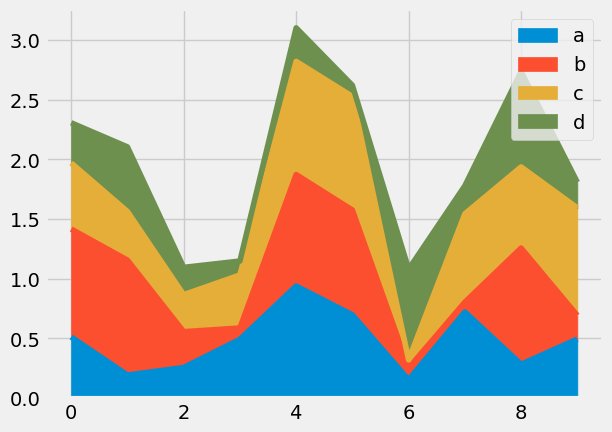

In [370]:
import numpy as np
# Dataset
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
 
# plot
df.plot.area()

# show the graph
plt.show()